# Show_OLP_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import package_DBR
from package_DBR import myRound

# Load data

In [2]:
Directory = 'Data/'

nameFile = 'Open_loop_experiment_on_MV_2023-02-11-12h54.txt'

nameFile = 'Open_loop_experiment_on_MV_2023-03-14-09h42.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(Directory + nameFile)

t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

# Plot loaded data

(45.0, 55.0)

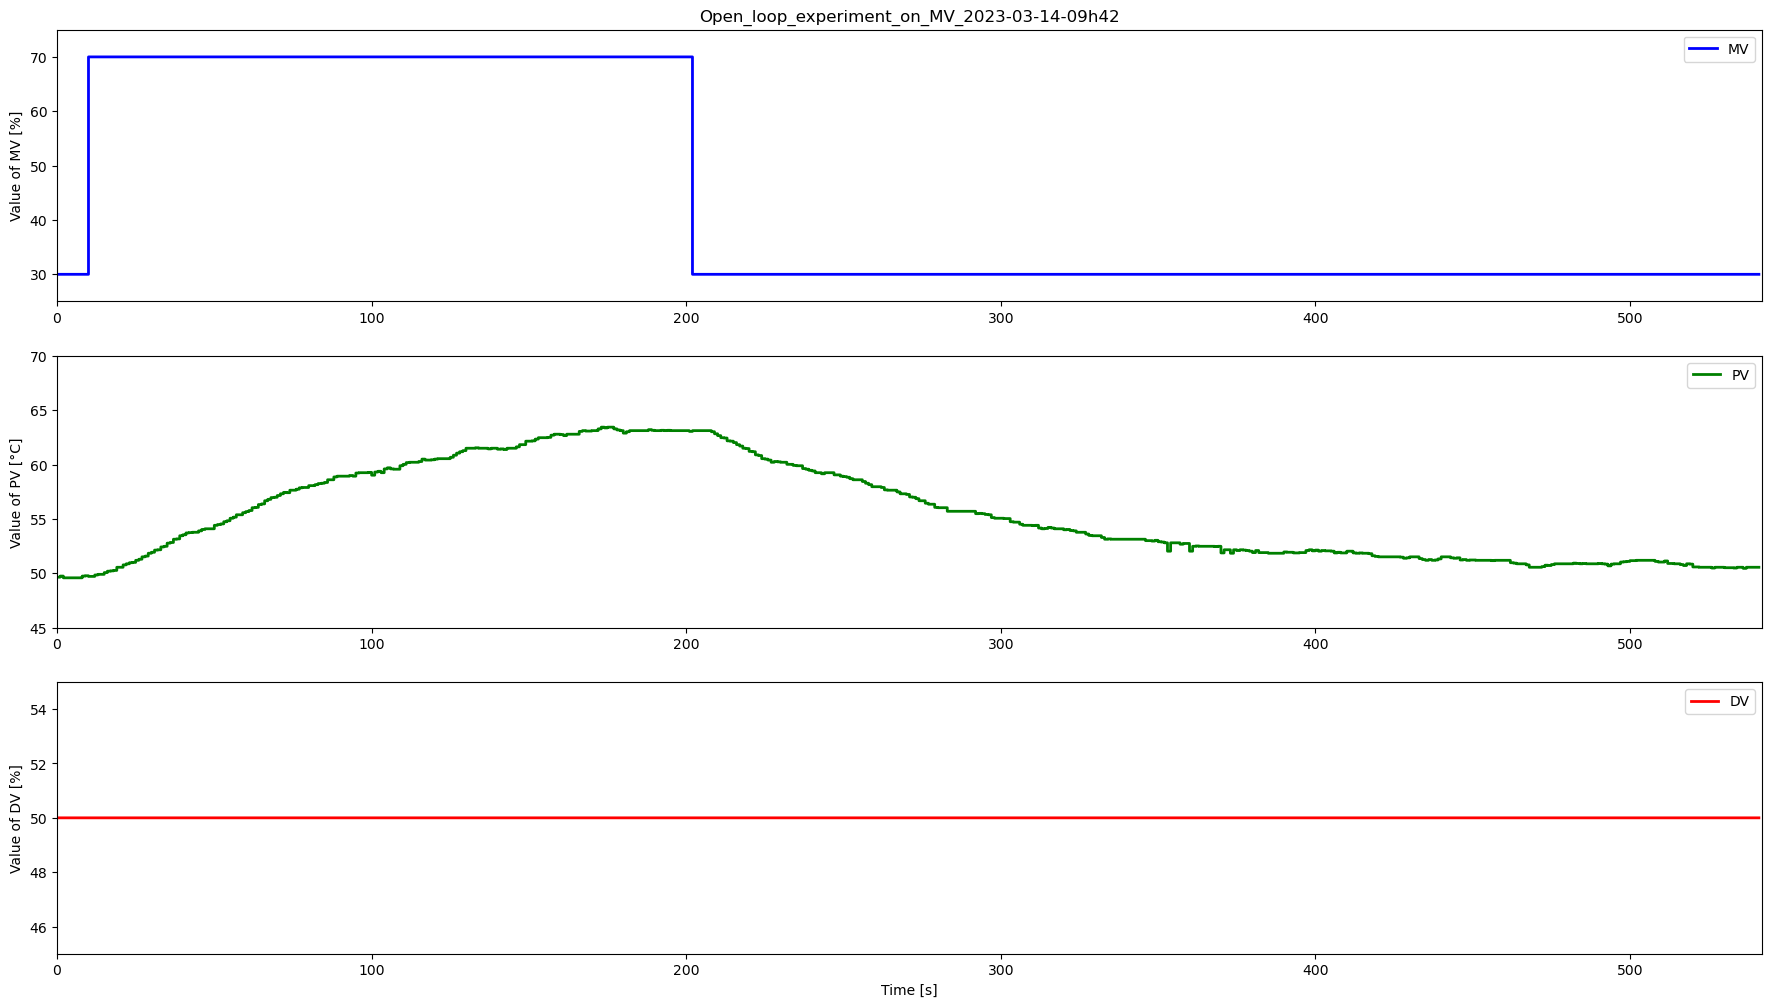

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

# if not os.path.exists('Plots'):
#     os.makedirs('Plots')

# plt.savefig('Plots\\' + titleName + '.png',transparent=True)
# plt.savefig('Plots\\' + titleName + '.pdf',transparent=True) 

# Clean data

In [4]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

# Plot cleaned data

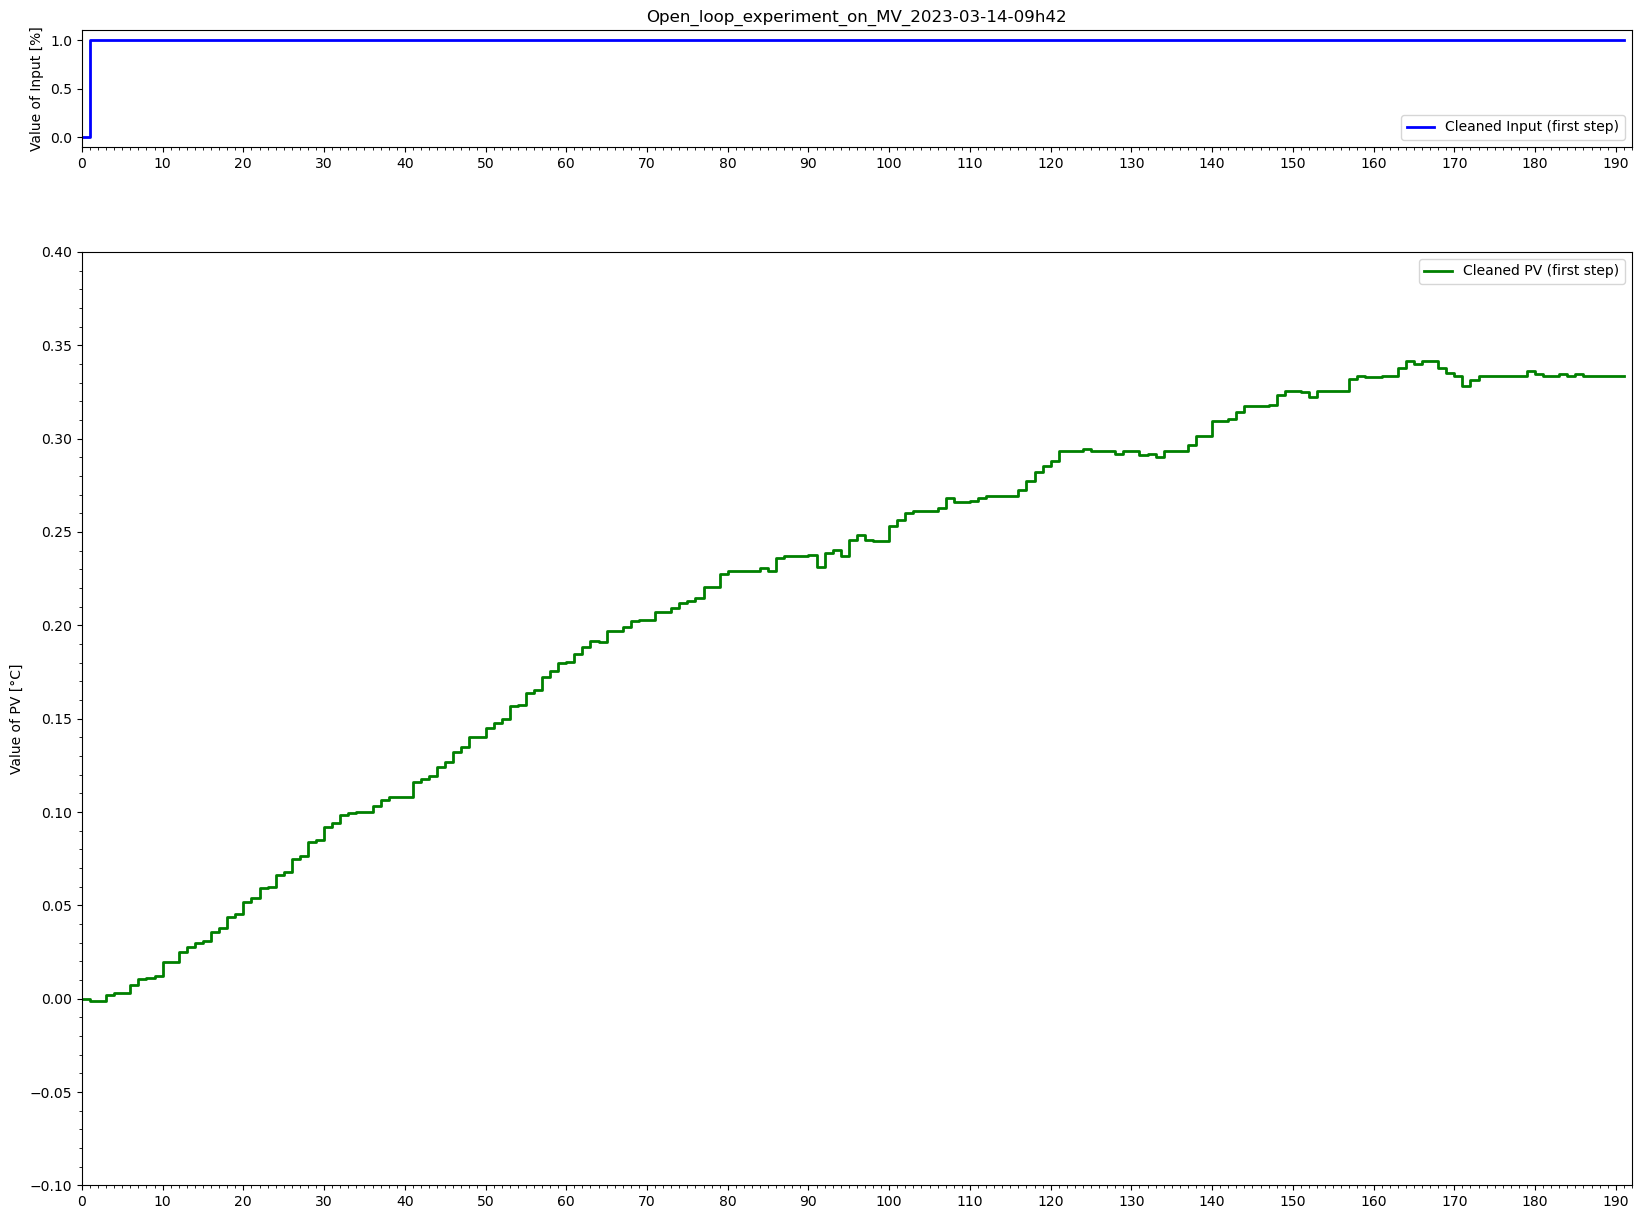

In [5]:
if ExpVariable == 'MV':
    Input = MVm
else:
    Input = DVm
    
DInput = np.diff(Input)
Index = np.where(np.diff(Input) != 0)[0]

Input = Input[0:Index[-1]]
Output = PVm[0:Index[-1]]
t = tm[0:Index[-1]]

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 8]})
fig.set_figheight(15)
fig.set_figwidth(20)

l1, = ax1.step([0,1],[0,1],'b-',linewidth=2,label='Cleaned Input (first step)',where='post')
ax1.set_ylabel('Value of Input [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(t,Input)
ax1.set_ylim(myRound(np.min(Input),1)-0.1, myRound(np.max(Input),1)+0.1)  

l2, = ax2.step([0,1],[0,1],'g-',linewidth=2,label='Cleaned PV (first step)',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(t,Output)
ax2.set_ylim(myRound(np.min(Output),0.1)-0.1, myRound(np.max(Output),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Axis minor and major ticks
multiplier = 10
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_major_locator(locator)    
ax2.xaxis.set_major_locator(locator)

multiplier = 1
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_minor_locator(locator)    
ax2.xaxis.set_minor_locator(locator)    
    
multiplier = 0.05
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_major_locator(locator)
    
multiplier = 0.01
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_minor_locator(locator)

if not os.path.exists('Plots'):
    os.makedirs('Plots')

plt.savefig('Plots\Graphical_methods_' + titleName + '.png',transparent=True)
plt.savefig('Plots\Graphical_methods_' + titleName + '.pdf',transparent=True) 